In [3]:
import networkx as nx
import matplotlib.pyplot as plt 

In [4]:
# 비어있는 그래프 (네트워크) 생성
g = nx.Graph()

In [5]:
g.add_nodes_from([1,2,3,4,5,6]) # 한번에 여러 노드 추가 / 리스트로부터 노드 추가
#g.add_node(1) -> 한번에 하나의 노드만 추가 가능

In [6]:
g.nodes()   #노드확인

NodeView((1, 2, 3, 4, 5, 6))

In [7]:
g.edges()   #엣지 정보 확인 -> 아무것도 없음

EdgeView([])

In [19]:
# 한번에 여러 엣지 추가 / 리스트로부터 엣지 추가
g.add_edges_from([(1,3), (2,4), (2,5), (2,6), (3,4), (4,6), (5,6)])  
#g.add_edge(1,3) -> 한번에 하나의 엣지만 추가함
#하나의 원소는 노드 사이의 엣지를 의미함

In [21]:
print(g.nodes())
print(g.edges())

[1, 2, 3, 4, 5, 6]
[(1, 3), (2, 4), (2, 5), (2, 6), (3, 4), (4, 6), (5, 6)]


In [29]:
# basic calculations
print(g.number_of_nodes()) # number of nodes
print(g.number_of_edges()) # number of edges

6
7


In [41]:
g[3]     #3이라는 노드가 1과 4에 연결되어있다는 뜻 / 사전 형태로 return

AtlasView({1: {}, 4: {}})

In [43]:
list(g.neighbors(5))   #(2, 6)는 5번째 엣지

[2, 6]

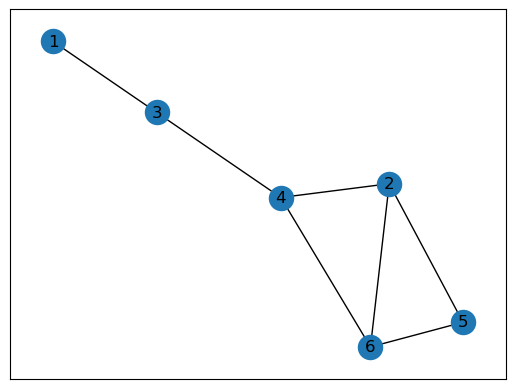

In [45]:
# networkX를 이용해서 시각화 하기
nx.draw_networkx(g)
plt.show()   #시각화한 것을 보여줌
#더 예쁘게 네트워크를 시각화할 수 있는 파일: gephi

In [47]:
# graphML 파일로 저장하기 -> Gephi에서 불러오기
nx.write_graphml(g, 'test.graphml')

In [55]:
# 디그리 정보를 노드 속성으로 추가하기
degree_dict = dict(nx.degree(g))
for node in g.nodes():
    g.nodes[node]['degree']=degree_dict[node]
nx.get_node_attributes(g, 'degree')

{1: 1, 2: 3, 3: 2, 4: 3, 5: 2, 6: 3}

In [57]:
# 노드에 성별정보를 추가 (명목정보임)
g.nodes[1]['gender']='male'
g.nodes[2]['gender']='female'
g.nodes[3]['gender']='male'
g.nodes[4]['gender']='female'
g.nodes[5]['gender']='male'
g.nodes[6]['gender']='male'

In [59]:
nx.get_node_attributes(g, 'gender') 
#두개의 인자를 받음. 속성의 정보를 확인하고자 하는 네트워크의 이름 + 노드들의 속성 중 확인하고자 하는 속성의 이름

{1: 'male', 2: 'female', 3: 'male', 4: 'female', 5: 'male', 6: 'male'}

In [65]:
# 엣지에도 속성 정보 추가 (여기서는 무겟값을 넣어줌)
g[1][3]['weight'] = 3    
#엣지가 같는 무겟값이란, 일종의 친밀도로 볼 수 있음 (연결강도 -> 무겟갑소가 연결강도는 비례)
# alternatively  
# g.edges[1, 3]['weight'] = 3  // 난 이게 더 편할 듯 (1, 3 사이의 엣지 무겟값을 3으로)
g[2][4]['weight'] = 1
g[2][5]['weight'] = 4
g[2][6]['weight'] = 3
g[3][4]['weight'] = 2
g[4][6]['weight'] = 3
g[5][6]['weight'] = 4


In [67]:
nx.get_edge_attributes(g, 'weight')

{(1, 3): 3, (2, 4): 1, (2, 5): 4, (2, 6): 3, (3, 4): 2, (4, 6): 3, (5, 6): 4}

In [69]:
g[3]  #이번에는 3번 노드가 1, 4번과 연결되어 있으며, 각각 3, 2의 연결강도로 연결되어 있음을 알 수 있음

AtlasView({1: {'weight': 3}, 4: {'weight': 2}})

In [71]:
# graphML 파일로 저장하기 -> Gephi에서 불러오기
nx.write_graphml(g, 'test1.graphml')